In [1]:
import os
from itertools import combinations
from collections import defaultdict
import networkx as nx
os.chdir('/home')

In [2]:
data_labels = 'data/labels/train_labels.txt'

## Load the data into array

In [3]:
arr = []
with open(data_labels, 'r') as file:
    for line in file:
        data = line.split(' ')
        data[1:] = [int(datum) for datum in data[1:]]
        arr.append(data)

## Utility Functions for Generating Adjacency Lists

In [4]:
def generate_adjacency_lists(arr):
    """Make an adjacency list."""
    adj = defaultdict(lambda: defaultdict(int))
    for line in arr:
        combs = combinations(line[1:], 2)
        for combo in combs:
            update_node(adj, combo[0], combo[1])
    return adj
            
            
def update_node(adj, n1, n2):
    adj[n1][n2] += 1
    adj[n2][n1] += 1
    
def prune_adjacency(adjacency_lists, min_appearances=100):
    nodes_deleted = []
    edges_deleted = []
    for node in adjacency_lists:
        if n_visited(adjacency_lists, node) < min_appearances:
            nodes_deleted.append(node)
    
    # Delete the nodes
    for node in nodes_deleted:
        del adjacency_lists[node]
            
    # Delete corresponding edges as well
    for node, edges in adjacency_lists.items():
        for edge_id in edges.keys():
            if edge_id in nodes_deleted:
                edges_deleted.append((node, edge_id))
    
    for node, edge in edges_deleted:
        edges = adjacency_lists.get(node)
        del edges[edge]
                
def n_visited(adjacency_lists, node):
    edges = adjacency_lists[node]
    
    return sum(edges.values())

def n_connected(adjacency_lists, node):
    return len(adjacency_lists[node].values())

## Run and Prune

In [5]:
adj = generate_adjacency_lists(arr)
print("Nodes before pruning: {}".format(len(adj)))
#prune_adjacency(adj, min_appearances=25000)
#print("Nodes after pruning: {}".format(len(adj)))

Nodes before pruning: 3862


## Graph Related Helper Functions

In [6]:
def generate_graph(adjacency_list):
    G = nx.Graph()
    
    # Add nodes
    for node in adjacency_list.keys():
        G.add_node(node)
    
    for node, edges in adjacency_list.items():
        for edge, weight in edges.items():
            G.add_edge(node, edge, weight=weight)
    
    return G
    
def n_visited(adjacency_lists, node):
    edges = adjacency_lists[node]
    
    return sum(edges.values())

## Generate Graph

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


G = generate_graph(adj)
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')

max_weight = max(weights.values())
cmap_weights = [weight/max_weight for weight in weights.values()]

## Run Markov Clustering

In [8]:
newpos = {}
i = 0
for position in pos.values():
    newpos[i] = position
    i += 1

In [14]:
import markov_clustering as mc
matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix, inflation=1.4)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

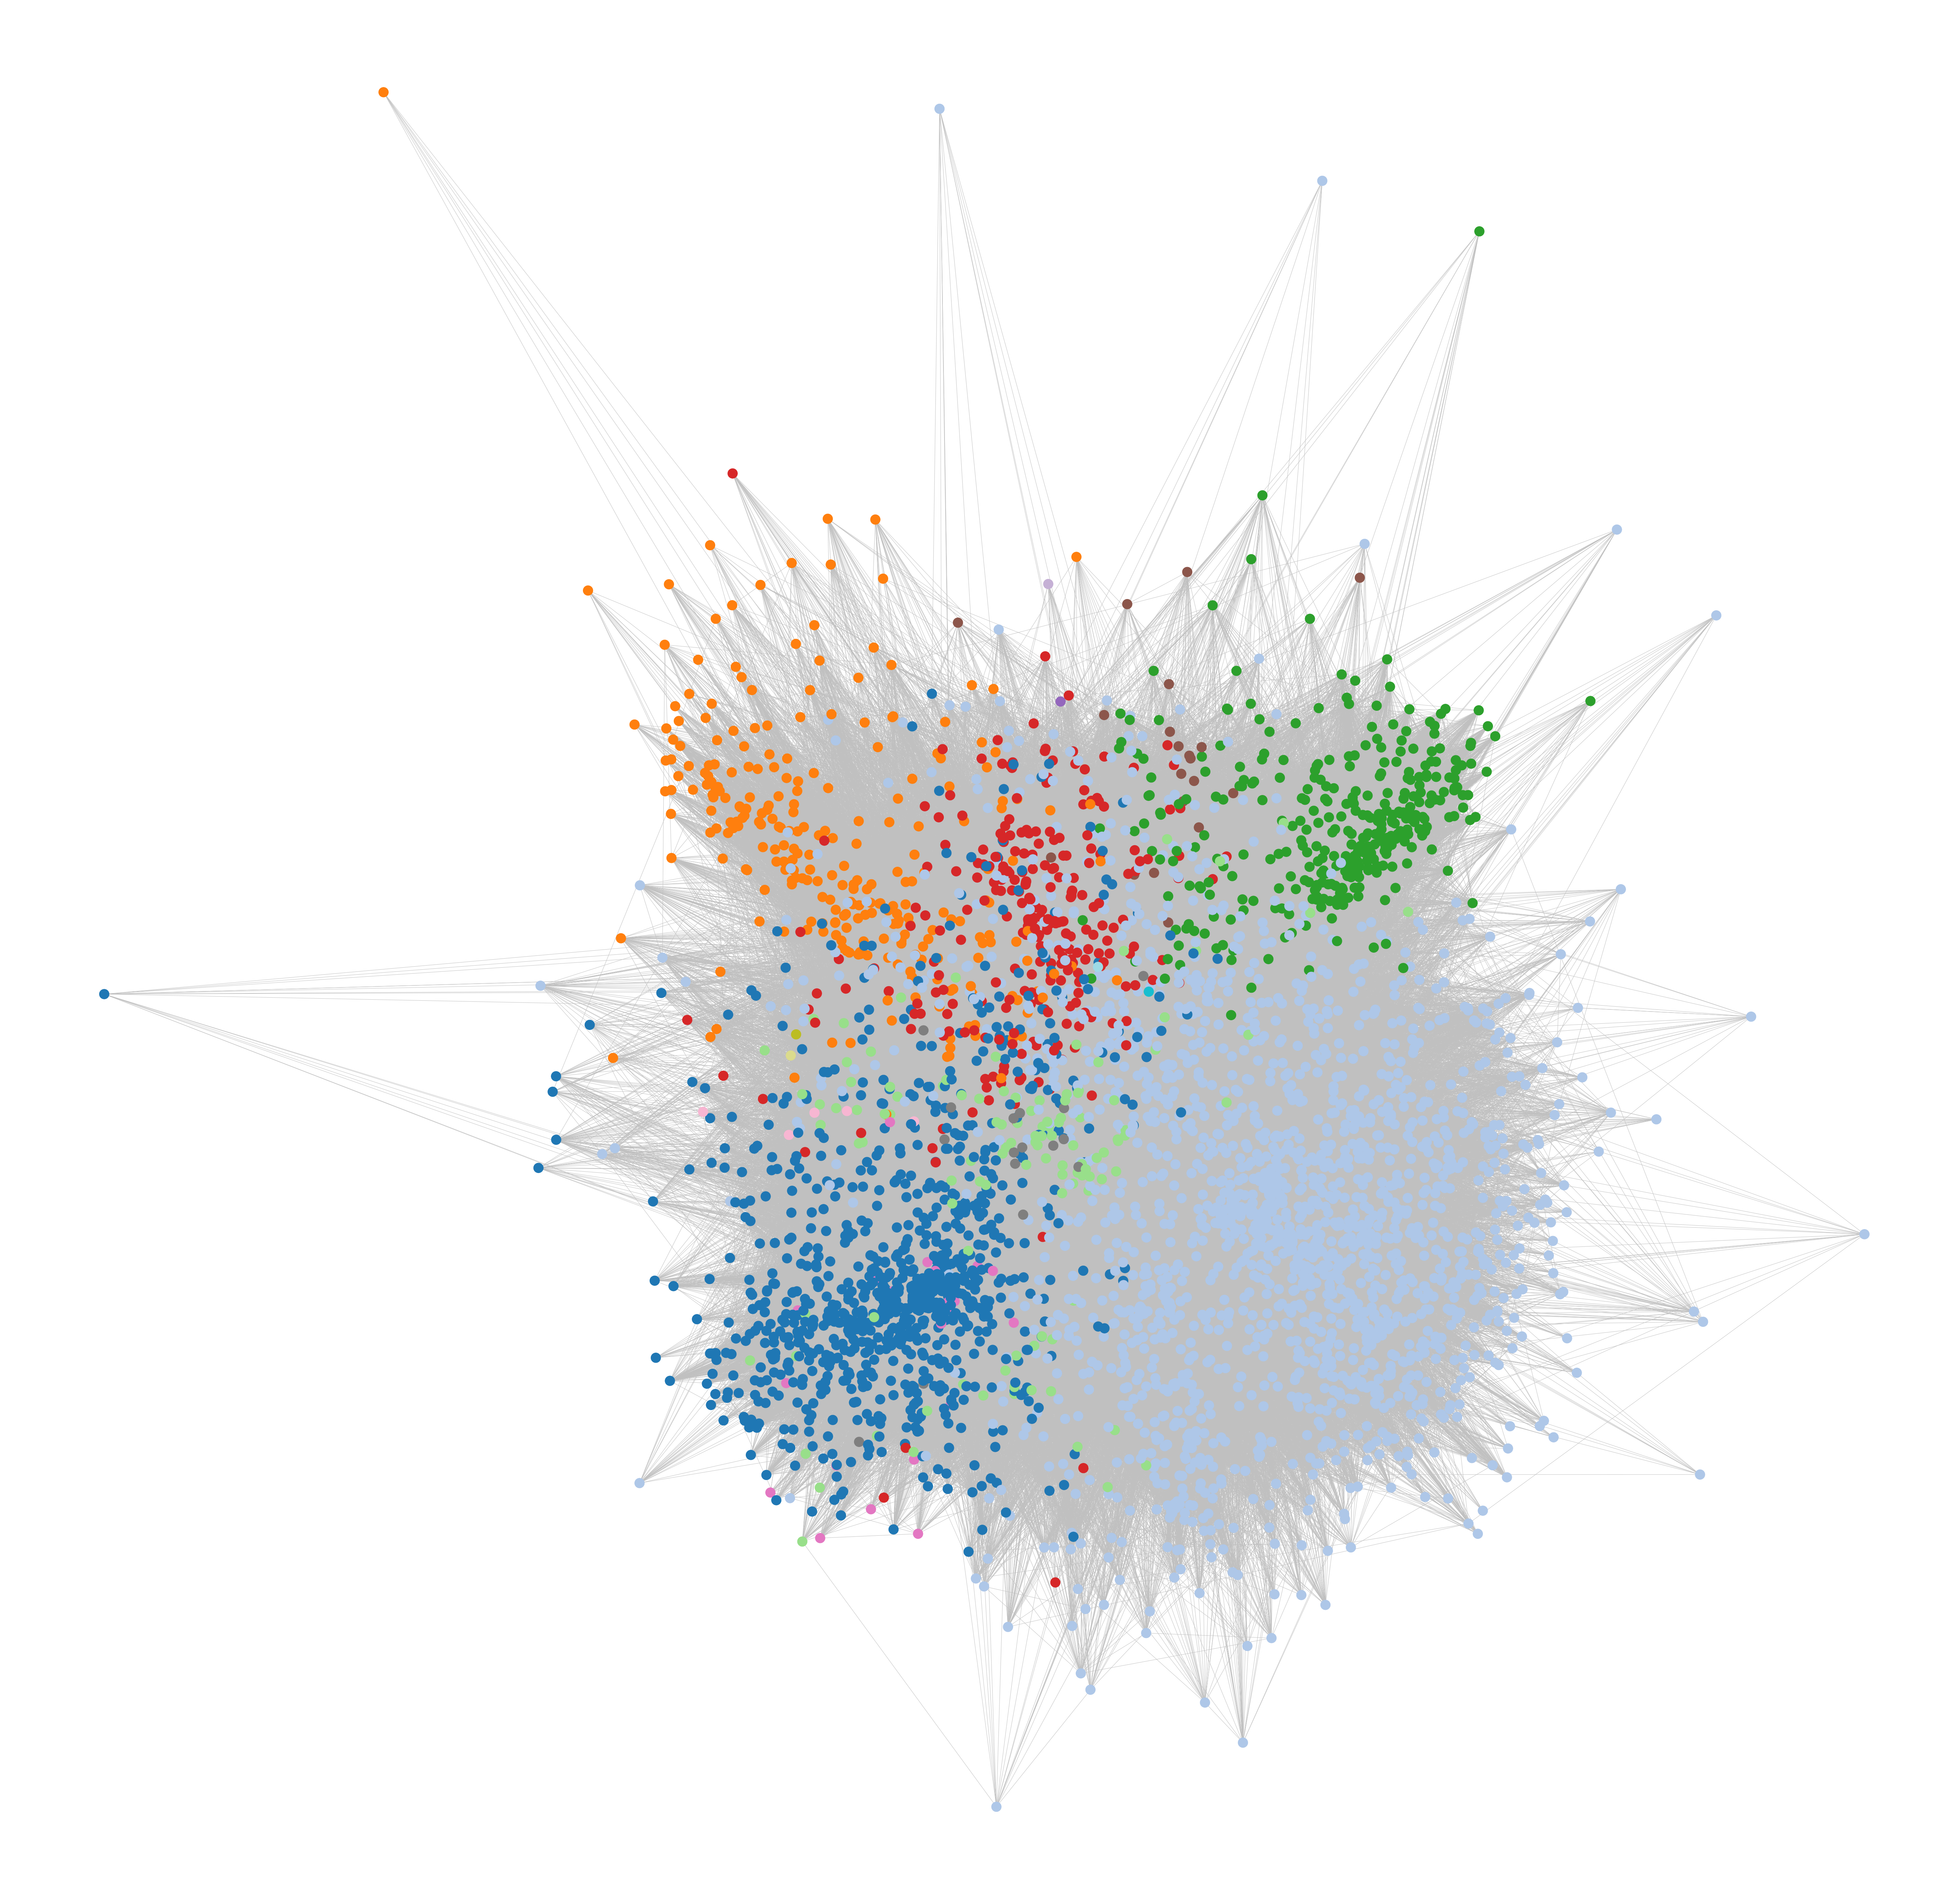

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(100, 100))
plt.subplot(111)

mc.draw_graph(matrix, clusters, pos=newpos, node_size=800, with_labels=False, edge_color="silver")